<a href="https://colab.research.google.com/github/ViBRUS/DA-Codes-SPPU/blob/main/DA_Assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics
## Assignment No. 1
By **Vishal Sonar**

GitHub: *https://github.com/ViBRUS*

# ASSIGNMENT-1 : IRIS DATASET:

Download the Iris flower dataset or any other dataset into a DataFrame. (eg https://archive.ics.uci.edu/ml/datasets/Iris ) Use Python/R and Perform following – 
1. How many features are there and what are their types (e.g., numeric, nominal)? 
2. Compute and display summary statistics for each feature available in the dataset.(eg. minimum value, maximum value, mean, range, standard deviation, variance and percentiles 
3. Data Visualization-Create a histogram for each feature in the dataset to illustrate the feature distributions. Plot each histogram. 
4. Create a box plot for each feature in the dataset. All of the box plots should be combined into a single plot. Compare distributions and identify outliers.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/DA_datasets/

iris1.csv  Iris.csv  Iris.csv.gsheet  Iris.xlsx  Pima.csv  store.csv


In [ ]:
!cp drive/MyDrive/DA_datasets/iris1.csv .

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Read Dataset

In [ ]:
data=pd.read_csv("iris1.csv",names=['sepal_length','sepal_width','petal_length','petal_width','species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Get statistics 

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1: Return total number of rows and columns

In [ ]:
data.shape

(150, 5)

### Print columns

In [ ]:
list(data.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [ ]:
print(data['species'].describe())

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: species, dtype: object


### The class distribution

In [ ]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### histograms

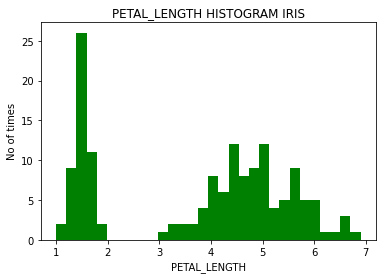

In [ ]:
plt.hist(data['petal_length'],bins=30,color=['green']) #bins represent no. of bars 

plt.ylabel('No of times')
plt.xlabel("PETAL_LENGTH");
plt.title("PETAL_LENGTH HISTOGRAM IRIS")
plt.show()

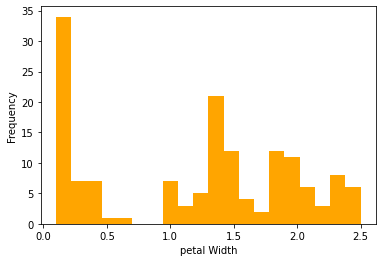

In [ ]:
plt.hist(data['petal_width'],bins=20,color=['orange'])
plt.xlabel("petal Width");
plt.ylabel('Frequency')
plt.show();

box plot


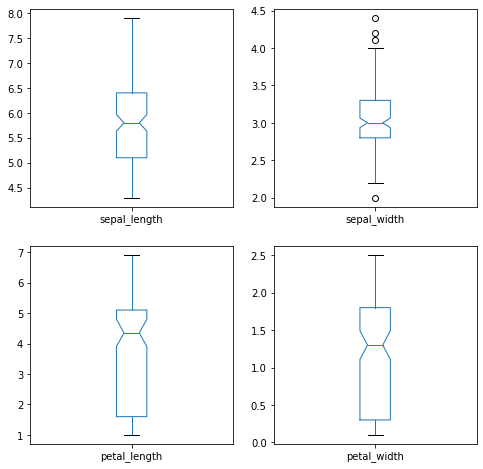

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize = (8,8),notch=True)
plt.show()

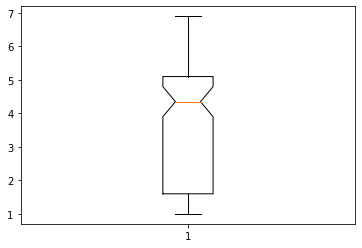

In [ ]:
plt.boxplot(data['petal_length'],notch=True)
plt.show()

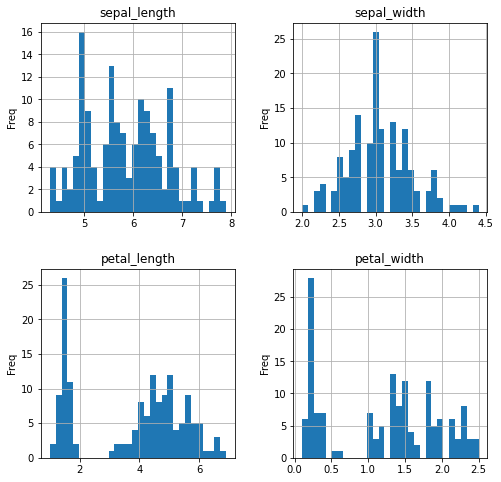

In [ ]:
histograph=data.hist(bins=30, figsize = (8,8));
for ax in histograph.flatten():
    ax.set_ylabel("Freq");
plt.show()

# EXTRA GRAPH
# Display density Graph


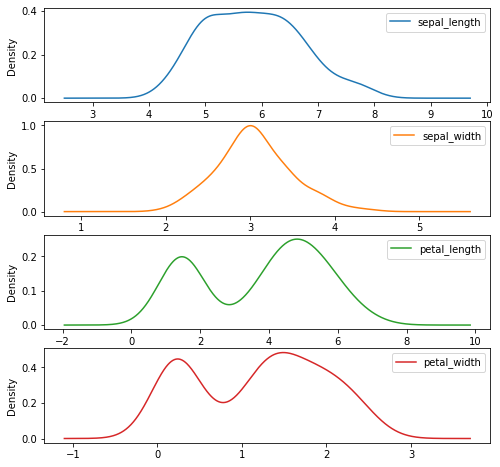

In [ ]:
data.plot(kind = "density", subplots = True, sharey = False,sharex=False, figsize = (8,8))
plt.show()

**EXTRA PART**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
train_data,test_data=train_test_split(data,test_size=0.30, random_state=2)
train_data.shape, test_data.shape

((105, 5), (45, 5))

In [ ]:
train_labels=train_data["species"].copy();
train_data=train_data.drop("species",axis=1);
test_labels=test_data["species"].copy();
test_data=test_data.drop("species",axis=1);

In [ ]:
classifier=GaussianNB();
classifier.fit(train_data,train_labels);
predict=classifier.predict(test_data);

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=accuracy_score(test_labels,predict)
accuracy

0.9777777777777777